In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)  #semilla
from keras.datasets import mnist  #cargar el conjunto de datos
from keras.utils import np_utils  #para generar las múltiples clases
from keras.layers.convolutional import Conv2D, MaxPooling2D  #para las capas convolucionales
from keras.layers.core import Flatten, Dense  #red neuronal común


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
# Normalizar los datos:
# Como son imágenes, los valores de los pixeles oscilan entre 0 y 255
# pero se requiere que estén entre 0 y 1, por tanto se dividen entre 255

X_train = x_train/255.0
X_test = x_test/255.0


In [4]:
nclasses = 10
Y_train = np_utils.to_categorical(y_train,nclasses)
Y_test = np_utils.to_categorical(y_test,nclasses)


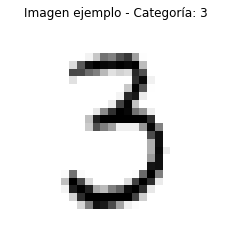

In [5]:
#Visualizar una imagen
nimagen = 50
plt.imshow(X_train[nimagen,:].reshape(28,28), cmap='gray_r')
plt.title('Imagen ejemplo - Categoría: ' + str(np.argmax(Y_train[nimagen])))
plt.axis('off')
plt.show()


In [6]:
#Indicar que solo se usará un canal de color (escala de grises)
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)


In [7]:
# Construir el modelo de red neuronal
modelo = Sequential()  #CONTENEDOR DEL MODELO
modelo.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))

#Aplanar la red para que se convierta en vector y crear la red neuronal con dos capas ocultas
modelo.add(Flatten())
modelo.add(Dense(120,activation='relu'))
modelo.add(Dense(84,activation='relu'))
modelo.add(Dense(nclasses,activation='sigmoid'))


In [8]:
modelo.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [9]:
#Compilar el modelo
#Se usa el optimizer SGD porque es un ejemplo multiclase

modelo.compile(tf.keras.optimizers.SGD(0.2), loss='categorical_crossentropy',
                   metrics=['accuracy'])


#ENTRENAMIENTO

In [10]:
modeloEntrenado = modelo.fit(X_train, Y_train, epochs=10, batch_size=128, verbose=2, validation_data=(X_test,Y_test))


Epoch 1/10
469/469 - 21s - loss: 0.3643 - accuracy: 0.8839 - val_loss: 0.0893 - val_accuracy: 0.9712
Epoch 2/10
469/469 - 21s - loss: 0.0815 - accuracy: 0.9746 - val_loss: 0.0684 - val_accuracy: 0.9775
Epoch 3/10
469/469 - 20s - loss: 0.0603 - accuracy: 0.9808 - val_loss: 0.0725 - val_accuracy: 0.9779
Epoch 4/10
469/469 - 21s - loss: 0.0471 - accuracy: 0.9856 - val_loss: 0.0477 - val_accuracy: 0.9851
Epoch 5/10
469/469 - 21s - loss: 0.0445 - accuracy: 0.9865 - val_loss: 0.0976 - val_accuracy: 0.9690
Epoch 6/10
469/469 - 21s - loss: 0.0332 - accuracy: 0.9892 - val_loss: 0.0468 - val_accuracy: 0.9851
Epoch 7/10
469/469 - 21s - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0463 - val_accuracy: 0.9856
Epoch 8/10
469/469 - 21s - loss: 0.0240 - accuracy: 0.9925 - val_loss: 0.0432 - val_accuracy: 0.9877
Epoch 9/10
469/469 - 21s - loss: 0.0212 - accuracy: 0.9933 - val_loss: 0.0423 - val_accuracy: 0.9881
Epoch 10/10
469/469 - 21s - loss: 0.0178 - accuracy: 0.9943 - val_loss: 0.0433 - val_accura

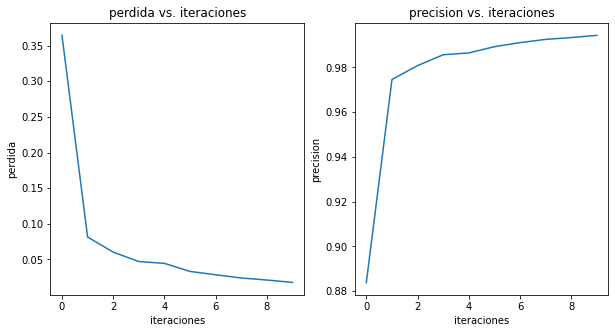

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(modeloEntrenado.history['loss'])
plt.title('perdida vs. iteraciones')
plt.ylabel('perdida')
plt.xlabel('iteraciones')

plt.subplot(1,2,2)
plt.plot(modeloEntrenado.history['accuracy'])
plt.title('precision vs. iteraciones')
plt.ylabel('precision')
plt.xlabel('iteraciones')
plt.show()


#validacion

In [15]:
puntaje = modelo.evaluate(X_test,Y_test,verbose=0)
print('Precisión en el set de validación: {:.1f}%'.format(100*puntaje[1]))


Precisión en el set de validación: 98.7%


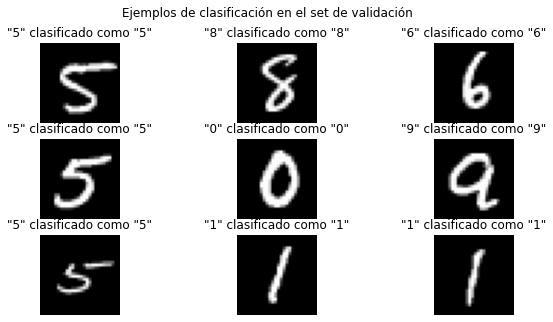

In [14]:
Y_pred = modelo.predict(X_test)
classes_y=np.argmax(Y_pred,axis=1)

plt.figure(figsize=(10,5))
imagenes = np.random.randint(0,X_test.shape[0],9)
for i in range(len(imagenes)):
	idx = imagenes[i]
	img = X_test[idx,:].reshape(28,28)
	cat_original = np.argmax(Y_test[idx,:])
	cat_prediccion = classes_y[idx]

	plt.subplot(3,3,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title('"{}" clasificado como "{}"'.format(cat_original,cat_prediccion))
plt.suptitle('Ejemplos de clasificación en el set de validación')
plt.show()


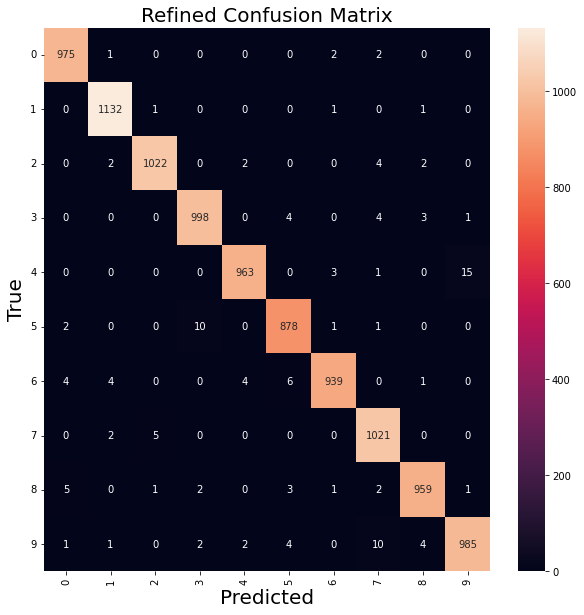

In [16]:
#Matriz de confusión
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = ['0','1','2','3','4','5','6','7','8','9']
#Y_pred = modelo.predict(X_test)
#classes_y=np.argmax(Y_pred,axis=1)
y_true=np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, classes_y)

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(10, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.show()


Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]


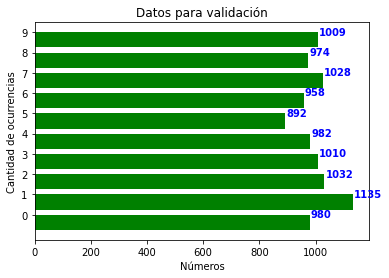

In [17]:
import pandas as pd
import numpy as np
from collections import Counter

df = pd.DataFrame(y_test, columns = ['Número'])
conteo=Counter(y_test)
conteo_ordenado = [0 for i in range(10)]
print(conteo)
for num, cont in conteo.items():
  conteo_ordenado[num] = cont 
print(conteo_ordenado)

fig, ax = plt.subplots() 
ind = np.arange(len(conteo_ordenado))  #ubicaciones de los grupos
width = 0.75  #ancho de la barra
ax.barh(ind, conteo_ordenado, width, color = "green") 

ax.set_yticks(ind+width/2)  
ax.set_yticklabels(class_names, minor=False)
plt.ylabel('Cantidad de ocurrencias')
plt.xlabel('Números')
plt.title('Datos para validación')
for i, v in enumerate(conteo_ordenado):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.show()
